In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Carregar dados

In [121]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [122]:
df_vendas = pd.DataFrame(dados_vendas)

In [123]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [124]:
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


# EDA

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Janeiro'),
  Text(1, 0, 'Fevereiro'),
  Text(2, 0, 'Março'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Maio'),
  Text(5, 0, 'Junho'),
  Text(6, 0, 'Julho'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Setembro'),
  Text(9, 0, 'Outubro'),
  Text(10, 0, 'Novembro'),
  Text(11, 0, 'Dezembro')])

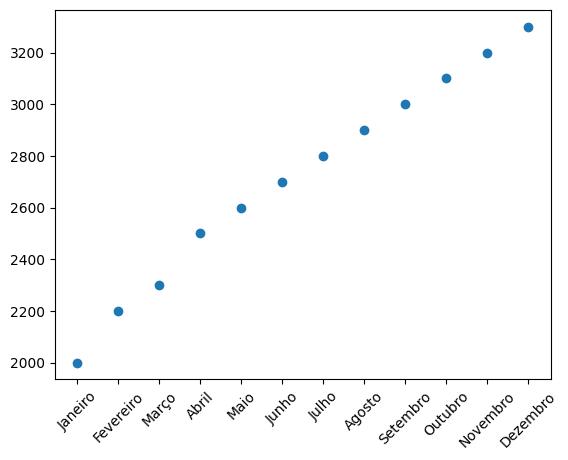

In [125]:
# Visualizar se exite alguma tendência ao longo do ano
plt.scatter(df_vendas['mes'], df_vendas['vendas'])
plt.xticks(rotation=45)

In [126]:
df_model_train = df_vendas.copy()

In [127]:
# Converter a variável mês de object para int

# Testar com o mes encoded
le = LabelEncoder()
df_model_train['mes_encoded'] = le.fit_transform(df_model_train['mes'])

#Testar com o mesmo ordinal
df_model_train['mes_numeric'] = range(1, 13)

In [128]:
df_model_train['mes']

0       Janeiro
1     Fevereiro
2         Março
3         Abril
4          Maio
5         Junho
6         Julho
7        Agosto
8      Setembro
9       Outubro
10     Novembro
11     Dezembro
Name: mes, dtype: object

# Treinar o modelo

In [139]:
# Dividir os dados em treino e teste (vou testar com os numeros de meses ordinais e encoded)

X_num = df_model_train['mes_numeric']
X_enc = df_model_train['mes_encoded']
y = df_model_train['vendas']

# Variáveis para os meses ordinais
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Variáveis para os meses encoded
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y, test_size=0.2, random_state=42)

In [140]:
#y_train_num
X_train_num

8      9
5      6
2      3
1      2
11    12
4      5
7      8
3      4
6      7
Name: mes_numeric, dtype: int64

In [141]:
y_train_num = np.array(y_train_num).reshape(-1, 1)
X_train_num = np.array(X_train_num).reshape(-1, 1)
y_train_enc= np.array(y_train_enc).reshape(-1, 1)
X_train_enc = np.array(X_train_enc).reshape(-1, 1)

In [142]:
# Declarar e treinar os modelos

# Modelo para os meses ordinais
model_num = LinearRegression()
model_num.fit(X_train_num, y_train_num)

# Modelo para os meses encoded
model_enc = LinearRegression()
model_enc.fit(X_train_enc, y_train_enc)

LinearRegression()

In [143]:
# Fazer previsões com o modelo numerico
X_test_num = np.array(X_test_num).reshape(-1, 1)
y_pred_num = model_num.predict(X_test_num)

# Fazer previsões com o modelo encoded
X_test_enc = np.array(X_test_enc).reshape(-1, 1)
y_pred_enc = model_enc.predict(X_test_enc)

# Avaliar os resultados

In [145]:
# Ver o Mean Squared Error e o R2 Score dos modelos e verificar qual fez melhores previsões

# Modelo numerico
mse_num = mean_squared_error(y_test_num, y_pred_num)
r2_num = r2_score(y_test_num, y_pred_num)

# Modelo encoded
mse_enc = mean_squared_error(y_test_enc, y_pred_enc)
r2_enc = r2_score(y_test_enc, y_pred_enc)

#Confrontar os modelos
print('MEAN SQAURED ERROR')
print(f'modelo numerico = {mse_num} , modelo encoded {mse_enc}')
print(' ')
print('R2 SCORE')
print(f'modelo numerico = {r2_num} , modelo encoded {r2_enc}')

# Nota: o Modelo numérico é sem dúvida melhor


MEAN SQAURED ERROR
modelo numerico = 5765.308510970324 , modelo encoded 306165.5522604334
 
R2 SCORE
modelo numerico = 0.9804933170681456 , modelo encoded -0.03589848509169191


In [153]:
X_num = np.array(X_num).reshape(-1, 1)
X_enc = np.array(X_enc).reshape(-1, 1)

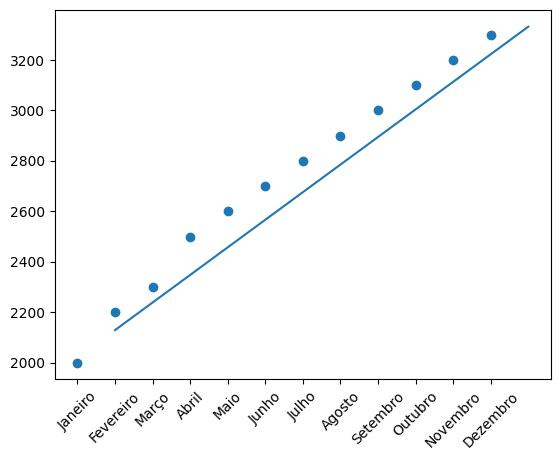

In [159]:
# Ver os resultados e as previsões

plt.scatter(df_vendas['mes'], df_vendas['vendas'])
plt.xticks(rotation=45)
plt.plot(df_model_train['mes_numeric'], model_num.predict(X_num))